# Сборный проект #1

***Описание проекта***<br>Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру
компьютерные игры. Из открытых источников доступны исторические данные о
продажах игр, оценки пользователей и экспертов, жанры и платформы
(например, Xboxили PlayStation).
<br>Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы
планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.
Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же
2027-й — по данным 2026 года.

***Цель проекта***<br> Вам нужно выявить определяющие успешность
игры закономерности. Это позволит сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании.

***Примечание***
<br>В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating
Board) — это ассоциация, определяющая возрастной рейтинг компьютерных
игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную
категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для
подростков».

***Описание данных***<br>

1. Name — название игры
2. Platform — платформа
3. Year_of_Release — год выпуска
4. Genre — жанр игры
5. NA_sales — продажи в Северной Америке (миллионы проданных копий)
6. EU_sales — продажи в Европе (миллионы проданных копий)
7. JP_sales — продажи в Японии (миллионы проданных копий)
8. Other_sales — продажи в других странах (миллионы проданных копий)
9. Critic_Score — оценка критиков (максимум 100)
10. User_Score — оценка пользователей (максимум 10)
11. Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
_____________________

***Оглавление***

***1. Предобработка данных:***
* [1. Изучение данных из файла](#1-bullet)
* [2. Замена названий столбцов](#2-bullet)
* [3. Обработка пропусков и преобразование типов](#3-bullet)
    * [3.1 Данные release_year](#4-bullet)
    * [3.2 Данные user_score](#5-bullet)
    * [3.3 Данные critic_score](#6-bullet)    
    * [3.4 Данные genre](#7-bullet)    
    * [3.5 Данные name](#8-bullet)
    * [3.6 Данные rating](#9-bullet)
* [4. Суммарные продажи по регионам](#10-bullet) 
* [5. Вывод по предобработке данных](#11-bullet)    
        

***2. Исследовательский анализ данных:***
* [1. Распределение выпуска игр по годам.](#12-bullet)
* [2. Продажи по платформам.](#13-bullet)
* [3. Распределение игр по жанрам](#14-bullet)
* [4.Выводы](#15-bullet)

**3. Портрет пользователя каждого региона:**
* [1. Портрет пользователя: EU](#16-bullet)
* [2. Портрет пользователя: NA](#](#17-bullet)
* [3. Портрет пользователя: JP](#](#18-bullet)
* [4. Выводы](#19-bullet)

***Часть 4. Проверка гипотез :***
* [1. Средние пользовательские рейтинги платформ Xbox One и PC равны](#20-bullet)
* [2. Средние пользовательские рейтинги жанров Action и Sports разные](#21-bullet)
* [3. Выводы](#22-bullet)

***Часть 5. Общий вывод:***
* [Общие выводы](#23-bullet)

## Предобработка данных

<a class="anchor" id="1-bullet"></a>
### Изучение данных из файла

In [1]:
# импортируем нужные библиотеки

#pandas
import pandas as pd

# numpy
import numpy as np

# matplotlib
import matplotlib.pyplot as plt

# scipy stats
from scipy import stats as st

In [2]:
# загружаем данные из файла
df = pd.read_csv('/datasets/games.csv')

In [3]:
# выведем первые 5 строк датафрейма
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# выведем общую информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<strong>Вывод:</strong>
1. Датафрейм состоит из 10 колонок, 16715 строк
2. Заголовки колонок нужно привести к змеиному регистру
3. В столбцах есть пропуски
4. Данные некоторых колонок нужно привести к нужному типу данных (столбцы с годом выпуска и оценками пользователей)
5. Необходимо проверить датафрейм на наличие явных дубликатов.

<a class="anchor" id="2-bullet"></a>
### Замена названий столбцов

In [5]:
# выведем все названия колонок
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
# переименование столбцов
df = df.rename(columns = {'Name':'name', 'Platform':'platform', 'Year_of_Release':'release_year',
                          'Genre':'genre', 'NA_sales':'na_sales', 
                          'EU_sales':'eu_sales','JP_sales':'jp_sales','Other_sales':'other_sales',
                          'Critic_Score':'critic_score','User_Score':'user_score','Rating':'rating'})

In [7]:
# снова выведем названия колонок
df.columns

Index(['name', 'platform', 'release_year', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Название колонки "NA_sales" мы переименовали в usa_sales.

<a class="anchor" id="3-bullet"></a>
### Обработка пропусков и преобразование типов

<a class="anchor" id="4-bullet"></a>
#### Данные release_year

В первую очередь преобразуем тип данных в колонке release_year

In [8]:
# выведем уникальные значения столбца
df['release_year'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Без обработки пропусков мы не сможем изменить тип данных столбца, поэтому посчитаем кол-во пропусков и примем решение, как их заменить.

In [9]:
# посчитаем кол-во пропусков
print("В столбце release_year пропущено",len(df[df['release_year'].isna()]), "значений")

В столбце release_year пропущено 269 значений


В столбце release_year пропущено 269 значений


In [10]:
print('Количество строк с пропусками в столбце release_year составляет от общего объема датафрейма: {:0.0%}'.format(len(df[df['release_year'].isna()])/len(df)))

Количество строк с пропусками в столбце release_year составляет от общего объема датафрейма: 2%


Количество строк с пропусками в столбце release_year составляет от общего объема датафрейма: 2%


Объем пропусков составляет менее 2%, поэтому мы можем заменить пропуски на 0, чтобы преобразовать тип данных

In [11]:
# заменим пропуски на 0 
df['release_year'] = df['release_year'].replace(np.nan, 0)

In [12]:
# приведем к типу данных int
df['release_year'] = df['release_year'].astype('int')

In [13]:
# выведем уникальные значения столбца
df['release_year'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000,    0, 1995,
       1991, 1981, 1987, 1980, 1983])

In [14]:
# удалим нулевые значения
df = df.query('release_year > 0')

df['release_year'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

Т.к. в данном столбце нас интересует только год, то можем оставить тип данных int. Нулевые значения удалены

<a class="anchor" id="5-bullet"></a>
#### Данные user_score

Теперь рассмотрим столбец user_score:

In [15]:
# выведем уникальные значения столбца
display(df['user_score'].unique())

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Помимо того, что тип данных данного столбца - object, что не даст нам производить математические операции, также в данных обнаружены пропуски.

<br>Также есть значения tbd - 'to be determined'. Проверим, сколько строчек имеют значение 0 в данной колонке.

In [16]:
# посчитаем кол-во нулевых оценок
print(len(df.query('user_score == "0"')))

1


С нулевой оценкой нашлось всего лишь одно значение, значит tbd мы можем заменить на 0. <br> Теперь подсчитаем количество пропущенных значений в столбце user_score:

In [17]:
# посчитаем кол-во пропусков
print("В столбце user_score пропущено",len(df[df['user_score'].isna()]), "значений")

В столбце user_score пропущено 6607 значений


Данные столбцов user_score и critic_score могли быть пропущенны по причине того, что та или иная игра не попала в рейтинги, которые указывают игроки/журналисты на игровых сайтах. Т.к. объем пропущенных значений большой, то нам нужно заменить пропуски на среднее значение. Для этого сгруппируем данные по платформе и жанру. Если этого будет недостаточно, то сгруппируем дополнительно по жанру.


Заменим пропуски и tbd на 0.

In [18]:
# Замена пропусков на 0
df['user_score'] = df['user_score'].replace(np.nan, 0)

# замена tbd на 0
df['user_score'] = df['user_score'].replace('tbd', 0)

In [19]:
# приведем данные к float64
df['user_score'] = df['user_score'].astype('float64')

In [20]:
# приведем формат оценки к формату critic_score
df['user_score'] = df['user_score'] * 10

In [21]:
df.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,0.0,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,0.0,NaN


Заменим нулевые значения обратно на Nan.

In [22]:
# заменим нулевые значения на nan
df['user_score'] = df['user_score'].replace(0, np.nan)

In [23]:
# посчитаем кол-во пропусков
print("В столбце user_score пропущено",len(df[df['user_score'].isna()]), "значений")

В столбце user_score пропущено 8984 значений


Чтобы не исказить результаты, оставляем пропуски как есть.

<a class="anchor" id="6-bullet"></a>
#### Данные critic_score

Столбец с данными оценок критиков можно обработать по пропускам аналогично тому, как мы это делали в user_score

In [24]:
# выведем уникальные значения столбца
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [25]:
# посчитаем кол-во пропусков
print("В столбце critic_score пропущено",len(df[df['critic_score'].isna()]), "значений")

В столбце critic_score пропущено 8463 значений


<a class="anchor" id="7-bullet"></a>
#### Данные genre

In [26]:
# выведем уникальные значения столбца
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [27]:
# посчитаем кол-во пропусков
print("В столбце genre пропущено",len(df[df['genre'].isna()]), "значений")

В столбце genre пропущено 2 значений


В столбце genre пропусков не обнаружено, тип данных object указан корректно.

<a class="anchor" id="8-bullet"></a>
#### Данные name

In [28]:
# посчитаем кол-во пропусков
print("В столбце name пропущено",len(df[df['name'].isna()]), "значений")

В столбце name пропущено 2 значений


В столбце name пропусков не обнаружено.

<a class="anchor" id="9-bullet"></a>
#### Данные rating

In [29]:
# посчитаем кол-во пропусков
print("В столбце rating пропущено",len(df[df['rating'].isna()]), "значений")

В столбце rating пропущено 6678 значений


Пропуски в данных столбцах могли быть результатом технической ошибки. Так же вероятно и то, что в некоторых странах не существует подобного рейтинга, но есть аналоги, не указанные в данных.

In [30]:
# найдем количество уникальных значений столбца
df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

Для замены пропусков в столбце rating по каждому жанру найдем самый популярный рейтинг и заменим пропуски этим значением. 

In [31]:
# замена пропусков
#df['rating'] = df['rating'].fillna(df.groupby('genre')['rating'].transform(lambda x:x.mode().iat[0]))

Пропущенные значения заменим на "NR" - no rating

In [32]:
# заменим нулевые значения на nan
df['rating'] = df['rating'].replace(np.nan, 'NR')

In [33]:
# посчитаем кол-во пропусков
print("В столбце rating пропущено",len(df[df['rating'].isna()]), "значений")

В столбце rating пропущено 0 значений


In [34]:
# выведем кол-во уникальных значений столбца rating
df['rating'].value_counts()

NR      6678
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

<a class="anchor" id="10-bullet"></a>
### Cуммарные продажи во всех регионах

Для того, чтобы ответить на вопросы поставленные данным исследованием, нам нужно посчитать суммарный объем прибыли по каждой игре. Для этого сложим данные по продажам во всех регионах.

In [35]:
# найдём сумму продаж по всем регонам для каждой игры.
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [36]:
df.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NR,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NR,31.38


<a class="anchor" id="11-bullet"></a>
### Выводы

На данном этапе исследования было выполнено:
1. Изучен исходный файл с данными: загружена таблица с данными по продажам игр в каждом из 3х регионов, оценки критиков и игроков, возрастной рейтинг.
2. Названия столбцов приведены к змеиному регистру.
3. Обработаны пропуски в столбцах, где это необходимо и обосновано.
4. Изменены типы данных.

## Исследовательский анализ данных

1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды? <br>
2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы? <br>
3. Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. <br>
4. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.<br>
5. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы. Соотнесите выводы с продажами игр на других платформах.
6. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

<a class="anchor" id="12-bullet"></a>
### Распределение выпуска игр по годам

Прежде, чем построить гистограмму по годам выпуска, посмотрим, какие уникальные значения есть и их количество.

In [37]:
display(df['release_year'].value_counts())

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: release_year, dtype: int64

Мы видим, что наибольшее кол-во игр было выпущено в 2008 и 2009 году, так же у нас остались строки с нулевым значением в колонке.

Уберем нулевые значения и построим график.

In [38]:
df_release = df.query('release_year > 0')

<AxesSubplot:title={'center':'Количество выпущенных игр по годам'}, xlabel='release_year'>

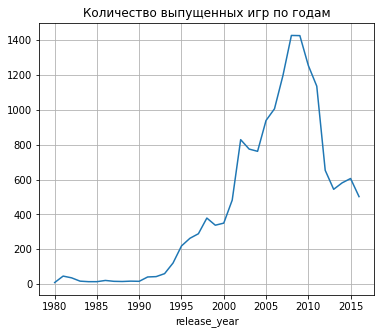

In [39]:
# строим график выпуска игр по годам
df_release.pivot_table(index ='release_year',values='name',aggfunc=['count']).plot(figsize=(6,5),legend=0,grid=True,title='Количество выпущенных игр по годам')

На графике есть хвост в левой части, посмотрим, какую долю от общего датафрейма занимают игры, выпущенные до 1999 года.

In [40]:
print(len(df.query('release_year <= 1999'))/16713*100)

11.823131693890982


Таких значений на весь датафрейм около 13 процентов, поэтому мы можем убрать их и построить заново график.

In [41]:
# обновим датафрейм, убрав игры выпущенные до 98 года
df_release=df.query('release_year >= 1999')

<AxesSubplot:title={'center':'Количество выпущенных игр по годам'}, xlabel='release_year'>

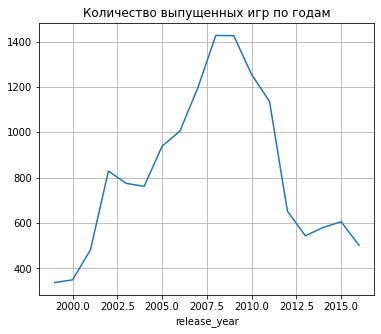

In [42]:
# график кол-ва выпущенных игр по годам
df_release.pivot_table(index ='release_year',values='name',aggfunc=['count']).plot(figsize=(6,5),legend=0,grid=True, title='Количество выпущенных игр по годам')

<strong>Вывод:</strong><br>
Мы рассмотрели датафрейм в разрезе дат выпуска игр и пришли к выводу, что основной объем выпуска пришелся на период с 1999 по 2016 год. Игры, выпущенные до этого периода (13% от всего датафрейма), можно не рассматривать.

In [43]:
# восстановим индексацию
df_release=df_release.reset_index()

In [44]:
# удалим дублирующий столбец
df_release = df_release.drop('index', 1)

<a class="anchor" id="13-bullet"></a>
### Продажи по платформам

Теперь рассмотрим, как для самых популярных платформ менялись продажи от года к году.

Сделаем датафрейм, где будет указана платформа и суммарное количество продаж за все года. 

In [45]:
# таблица с 5 самыми популярными по продажам платформам
df_platform = df_release.pivot_table(index=['platform'], values='all_sales',aggfunc='sum').sort_values(by='all_sales',ascending=False)

In [46]:
# выведем топ 5 платформ
df_platform.head()

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76


Мы получили 5 наиболее успешных по продажам платформ. Наложим данные о продажах на данных платформах по годам.

In [47]:
# по каждой из 5 платформ создадим отдельный датафрейм
df_ps2 = df_release.query('platform=="PS2"')
df_x360 = df_release.query('platform=="X360"')
df_wii = df_release.query('platform=="Wii"')
df_ps3 = df_release.query('platform=="PS3"')
df_ds = df_release.query('platform=="DS"')

In [48]:
# датафрейм преобразуем в пивот для подсчета суммарной выручки для платформы
df_ps2 = df_ps2.pivot_table(index='release_year', values='all_sales',aggfunc='sum')
df_x360 = df_x360.pivot_table(index='release_year', values='all_sales',aggfunc='sum')
df_wii = df_wii.pivot_table(index='release_year', values='all_sales',aggfunc='sum')
df_ps3 = df_ps3.pivot_table(index='release_year', values='all_sales',aggfunc='sum')
df_ds = df_ds.pivot_table(index='release_year', values='all_sales',aggfunc='sum')

<AxesSubplot:title={'center':'Объем выручки для популярных платформ'}, xlabel='release_year'>

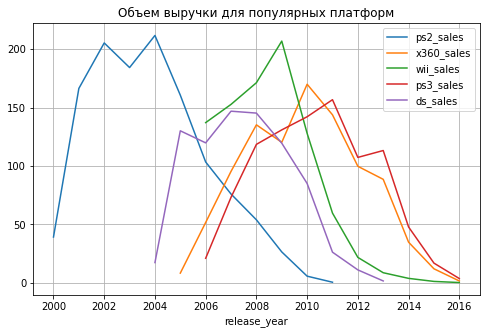

In [49]:
# построим графики
df_ps2 = df_ps2.rename(columns={'all_sales':'ps2_sales'}) # ps2
df_ps2['ps2_sales'].plot(legend=True)

df_x360 = df_x360.rename(columns={'all_sales':'x360_sales'}) # x360
df_x360['x360_sales'].plot(legend=True)

df_wii = df_wii.rename(columns={'all_sales':'wii_sales'}) # Wii
df_wii['wii_sales'].plot(legend=True)

df_ps3 = df_ps3.rename(columns={'all_sales':'ps3_sales'}) # ps3
df_ps3['ps3_sales'].plot(legend=True)

df_ds = df_ds.rename(columns={'all_sales':'ds_sales'}) # DS
df_ds['ds_sales'].plot(legend=True, grid=True, figsize=(8,5),title='Объем выручки для популярных платформ')

Воспользовавшись графиком, несложно подсчитать величину жизненного цикла каждой платформы и найти среднее значение этого показателя среди самых популярных платформ.

In [50]:
# подсчёт средней величины жизненного цикла платформы
df_ps2_time = df_release.query('platform=="PS2"')
df_x360_time = df_release.query('platform=="X360"')
df_wii_time = df_release.query('platform=="Wii"')
df_ps3_time = df_release.query('platform=="PS3"')
df_ds_time = df_release.query('platform=="DS"')

print("Среднее время жизненного цикла платформы составляет лет:",
    ((df_ps2_time['release_year'].max() - df_ps2_time['release_year'].min())+
      (df_x360_time['release_year'].max() - df_x360_time['release_year'].min())+
      (df_wii_time['release_year'].max() - df_wii_time['release_year'].min())+
      (df_ps3_time['release_year'].max() - df_ps3_time['release_year'].min())+
      (df_ds_time['release_year'].max() - df_ds_time['release_year'].min()))/5)

Среднее время жизненного цикла платформы составляет лет: 10.2


Определив величину жизненного цикла, выведем данные по продажам с 1999 по 2016 год, чтобы определить актуальный период.

In [51]:
# сводная таблица для 1999-2016 года
df_sales_year = df_release.pivot_table(index=['release_year'], values='all_sales',aggfunc='sum')

<AxesSubplot:title={'center':'Объём выручки для всех платформ'}, xlabel='release_year'>

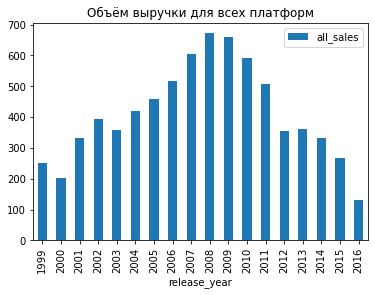

In [52]:
# график распределния объемов выручки по годам для всех платформ
df_sales_year.plot(kind='bar', legend=1, title='Объём выручки для всех платформ')

По данным графика видно, что пик объема продаж по всем платформам пришелся на 2008-2009 год и затем рынок начал падать. Наибольшее падение было с 11 по 12 год, после этого небольшое плато в 12-14 году и затем снова падение. <br> Предположим, что актуальный период для наиболее достоверного прогноза будет с 2012 по 2016 год. Построим сводную таблицу со значениями для данного периода, а затем выведем график.

In [53]:
# через query выделяем все игры с годом выпуска от 12го.
df_sales_new = df_release.query('release_year >= 2012')

In [54]:
# сводная таблица с выручкой по платформам за 12-16 год
df_sales_pivot = df_sales_new.pivot_table(index=['release_year'], columns='platform',values='all_sales',aggfunc='sum')

In [55]:
# сводная по продажам и платформам по годам

df_sales_pivot.head(10)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
release_year,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


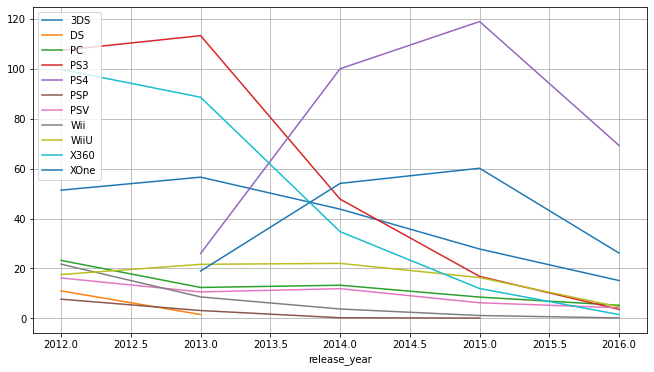

In [56]:
# график продаж по платформам за 12-16 год

df_sales_pivot.plot(grid=True, figsize=(11,6), legend='left')
plt.legend(loc='upper left')

Ранее мы уже определили средний жизненный цикл платформы в 10 лет, поэтому теперь мы можем сделать некоторый прогноз исходя из графика выше. <br> 

***XOne & PS4***<br>
Такие платформы как PS4 и XOne, которые были запущенны в 2013 году, будут иметь популярность предположительно до 2023 года, поэтому мы можем рассчитывать на эти платформы при построении рекламной компании. В 2016 году на данных платформах было продано 59 и 23.9 млн соответственно. Они же являются лидерами по продажам на 2016 год.<br>

***3DS***<br>
Ещё одной платформой, которая потенциально может приносить прибыль по величине, следующей после PS4 и XOne, является 3DS, продажи игр на которой начались в 2011 году.  В 2016 году на данной платформе продано 14.5 миллионов копий (3 место в 2016 году). <br>

***PC & PSV***<br>
Далее, на графике в 2016 году наблюдается отдельная группа платформ, имеющая примерно одинаковый уровень объема проданных копий игр. Наиболее интересными платформами здесь являются те, падение по которым за последние 2 года было минимальным: PC (падение на 38% с 15 по 16 год) и PSV (падение 31% c 15 на 16 год). Платформа PC универсальна (может иметь игры специльно выпущенные для данной платформы, а также игры с других платформ) и не подходит под наши условия жизненного цикла в 10 лет. PSV была запущена в 2011 году и еще имеет потенциал для выпуска игр: в 2016 году было продано 4.25 млн копий.<br>


Построим графики размаха продаж по описанным выше платформам.

<AxesSubplot:>

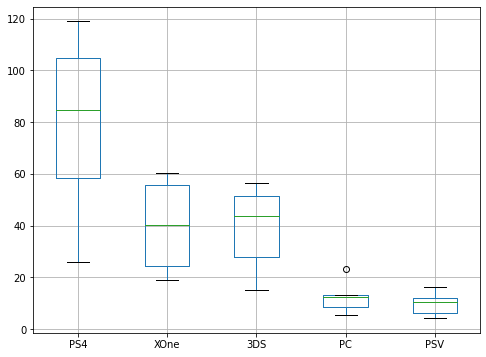

In [57]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

# диаграммы размаха для актульных платформ
df_sales_pivot.boxplot(column=['PS4','XOne','3DS','PC','PSV'], figsize=(8,6))

По данным диаграмм размаха потенциально прибыльных платформ можно выделить 3 категории прибыльности: высокая - PS4, средняя - XOne и 3DS, низкая - PC и PSV. Самый большой размах у PS4, медиана стремится к верхнему значению ящика. По XOne и 3DS данные схожи и распределены нормально, но по 3DS медиана выше. У PC есть выброс на уровне 22 млн, верхний ус практически совпадает с верхней границей ящика, данные скошены. По PSV размах выше, но объемы схожи с PC. Медиана по обеим платформам стремится к верхней границе ящика.

Посчитаем, как продажи по одной платформе зависят от оценок пользователей и критиков. Для этого возьмем самую прибыльную платформу с 2012 по 2016 год - PS4 - и построим по ней диаграмму рассеяния, посчитаем корреляцию.

In [58]:
# подготовим датафрейм для графика
df_ps4_critics = df_sales_new.query('platform == "PS4"')
df_ps4_critics = df_ps4_critics.reset_index()
df_ps4_critics = df_ps4_critics.drop('index', 1)

<AxesSubplot:title={'center':'критики/продажи'}, xlabel='all_sales', ylabel='critic_score'>

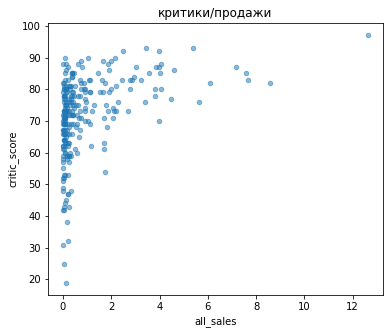

In [59]:
# строим диаграмму рассеяния для PS4 по оценкам критиков
df_ps4_critics.plot(x='all_sales', y='critic_score', kind='scatter', figsize=(6,5),alpha=0.5, title='критики/продажи')

In [60]:
# уберем выбросы
df_ps4_critics_scatter = df_ps4_critics.query('all_sales < 4 and critic_score > 40 & critic_score.notna()')

In [61]:
# корреляция между оценками критиков и продажами ps4
print(df_ps4_critics_scatter['all_sales'].corr(df_ps4_critics_scatter['critic_score']))

0.40103063970161373


<AxesSubplot:title={'center':'пользователи/продажи'}, xlabel='all_sales', ylabel='user_score'>

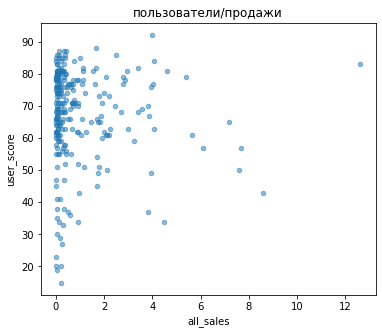

In [62]:
# строим диаграмму рассеяния для PS4 по оценкам пользователей
df_ps4_critics.plot(x='all_sales', y='user_score', kind='scatter', figsize=(6,5),alpha=0.5, title='пользователи/продажи')

In [63]:
# уберем выбросы
df_ps4_critics_scatter_2 = df_ps4_critics.query('all_sales < 3 and user_score > 52 & user_score.notna()')

In [64]:
# корреляция между оценками пользователей и продажами ps4
print(df_ps4_critics_scatter_2['all_sales'].corr(df_ps4_critics_scatter_2['user_score']))

-0.02264124440379872


Для самой платформы на актуальный период - PS4 - уровень корреляции между продажами и оценкой пользователей отсутствует, корреляция между продажами и оценкой критиков сильнее - 0.4. Таким образом, оценки критиков влияют на продажи сильнее, чем оценки пользователей. 

Теперь рассмотрим уровни корреляции для следующих 4 самых перспективных платформ с точки зрения глобальных продаж и оценками критиков и пользователей:

***XOne***

In [65]:
# XOne
df_xone_critics = df_sales_new.query('platform == "XOne"')

<AxesSubplot:title={'center':'критики/продажи'}, xlabel='all_sales', ylabel='critic_score'>

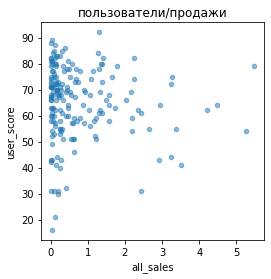

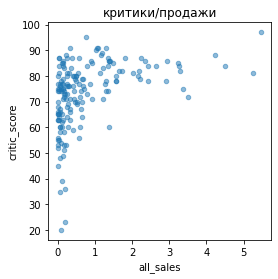

In [66]:
# XOne
# строим диаграмму рассеяния для XOne по оценкам пользователей
df_xone_critics.plot(x='all_sales', y='user_score', kind='scatter', figsize=(4,4),alpha=0.5, title='пользователи/продажи')
df_xone_critics.plot(x='all_sales', y='critic_score', kind='scatter', figsize=(4,4),alpha=0.5, title='критики/продажи')

In [67]:
# XOne
# уберем выбросы
df_xone_critics_scatter = df_xone_critics.query('all_sales < 2 and critic_score > 50 & critic_score.notna()')

df_xone_critics_scatter_2 = df_xone_critics.query('all_sales < 2 and user_score > 50 & user_score.notna()')

In [68]:
# XOne
# корреляция
print("Корреляция между продажами и оценками критиков:",df_xone_critics_scatter['all_sales'].corr(df_xone_critics_scatter['critic_score']))
print("Корреляция между продажами и оценками пользователей:",df_xone_critics_scatter_2['all_sales'].corr(df_xone_critics_scatter_2['user_score']))

Корреляция между продажами и оценками критиков: 0.4411617058291996
Корреляция между продажами и оценками пользователей: -0.08847543632586603


***3DS***

In [69]:
# 3DS
df_3ds_critics = df_sales_new.query('platform == "3DS"')

<AxesSubplot:title={'center':'критики/продажи'}, xlabel='all_sales', ylabel='critic_score'>

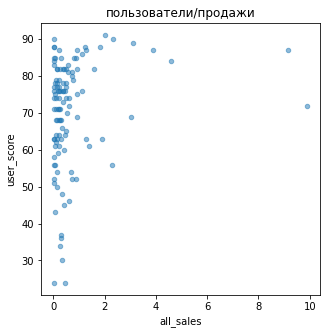

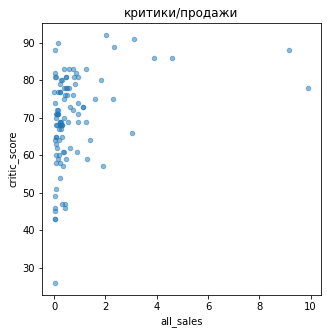

In [70]:
# 3DS
# строим диаграмму рассеяния для 3DS по оценкам пользователей
df_3ds_critics.plot(x='all_sales', y='user_score', kind='scatter', figsize=(5,5),alpha=0.5, title='пользователи/продажи')
df_3ds_critics.plot(x='all_sales', y='critic_score', kind='scatter', figsize=(5,5),alpha=0.5, title='критики/продажи')

In [71]:
# 3DS
# уберем выбросы
df_3ds_critics_scatter = df_3ds_critics.query('all_sales < 3 and critic_score > 55 & critic_score.notna()')
df_3ds_critics_scatter_2 = df_3ds_critics.query('all_sales < 3 and user_score > 55 & user_score.notna()')

In [72]:
# 3DS
# корреляция
print("Корреляция между продажами и оценками критиков:",df_3ds_critics_scatter['all_sales'].corr(df_3ds_critics_scatter['critic_score']))
print("Корреляция между продажами и оценками пользователей:",df_3ds_critics_scatter_2['all_sales'].corr(df_3ds_critics_scatter_2['user_score']))

Корреляция между продажами и оценками критиков: 0.2189090845425771
Корреляция между продажами и оценками пользователей: 0.17889521756053473


***PC***

In [73]:
# PC
df_pc_critics = df_sales_new.query('platform == "PC"')

<AxesSubplot:title={'center':'критики/продажи'}, xlabel='all_sales', ylabel='critic_score'>

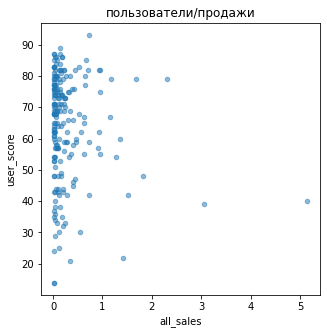

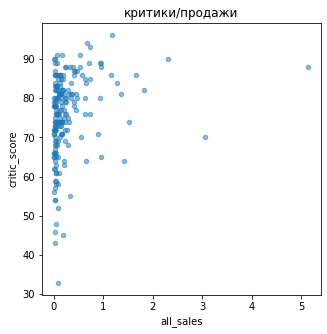

In [74]:
# PC
# строим диаграмму рассеяния для PC по оценкам пользователей
df_pc_critics.plot(x='all_sales', y='user_score', kind='scatter', figsize=(5,5),alpha=0.5, title='пользователи/продажи')
df_pc_critics.plot(x='all_sales', y='critic_score', kind='scatter', figsize=(5,5),alpha=0.5, title='критики/продажи')

In [75]:
# PC
# уберем выбросы
df_pc_critics_scatter_1 = df_pc_critics.query('all_sales < 1 and critic_score > 30 & critic_score.notna()')
df_pc_critics_scatter_2 = df_pc_critics.query('all_sales < 1 and user_score > 52 & user_score.notna()')

In [76]:
# PC
# корреляция 
print("Корреляция между продажами и оценками критиков:",df_pc_critics_scatter_1['all_sales'].corr(df_pc_critics_scatter_1['critic_score']))
print("Корреляция между продажами и оценками пользователей:",df_pc_critics_scatter_2['all_sales'].corr(df_pc_critics_scatter_2['user_score']))

Корреляция между продажами и оценками критиков: 0.3144255449057993
Корреляция между продажами и оценками пользователей: -0.030561287462257048


***PSV***

In [77]:
# PSV
df_psv_critics = df_sales_new.query('platform == "PSV"')

<AxesSubplot:title={'center':'критики/продажи'}, xlabel='all_sales', ylabel='critic_score'>

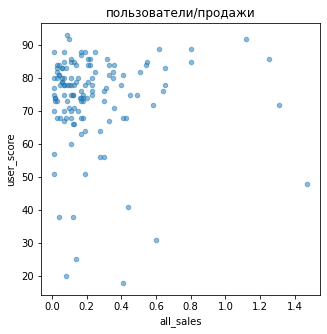

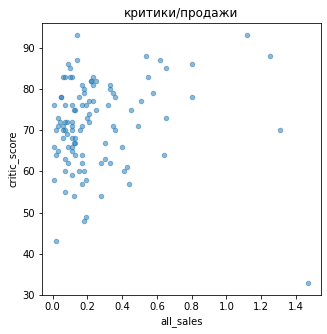

In [78]:
# PSV
# строим диаграмму рассеяния для PSV по оценкам пользователей
df_psv_critics.plot(x='all_sales', y='user_score', kind='scatter', figsize=(5,5),alpha=0.5, title='пользователи/продажи')
df_psv_critics.plot(x='all_sales', y='critic_score', kind='scatter', figsize=(5,5),alpha=0.5, title='критики/продажи')

In [79]:
# PSV
# уберем выбросы
df_psv_critics_scatter = df_psv_critics.query('all_sales <= 0.5  and critic_score >= 55 & critic_score.notna()')
df_psv_critics_scatter_2 = df_psv_critics.query('all_sales <= 0.5  and user_score >= 55 & user_score.notna()')

In [80]:
# PSV
# корреляция
print("Корреляция между продажами и оценками критиков:",df_psv_critics_scatter['all_sales'].corr(df_psv_critics_scatter['critic_score']))
print("Корреляция между продажами и оценками пользователей:",df_psv_critics_scatter_2['all_sales'].corr(df_psv_critics_scatter_2['user_score']))

Корреляция между продажами и оценками критиков: -0.01430032240661797
Корреляция между продажами и оценками пользователей: -0.07437975979698751


По всем рассмотренным выше платфомам наблюдается очень низкий уровень корреляции между объемом продаж и оценками пользователей.

<BR> Однако не всё так однозначно по корреляции между оценками критиков и продажей: для платформ PS4 и XOne корреляция умеренная  0.38-0.4, в то время как для 3DS корреляция по критикам ниже: 0.3. По PC корреляция между продажами и критиками 0.28, что может быть объяснено тем, что компьютер является универсальным средством, которое сейчас есть у каждого дома и люди играют время от времени, не покупая для этого специальную приставку, но существует некоторое количество игроков, которые ориентируются на критиков при покупке той или иной игры.
    
<br> Можно предположить, что аудитория платформ XOne,PS4,PC более хардкорная и пользователи часто ориентируются на мнение критиков, прежде чем покупать следующую игру, где пользователи портативных, более казуальных платформ, таких как PSV, мало ориентируются на отзывы как критиков, так и игроков, и покупают то, что им самим было бы интересно.<br> 
    
<br> Из данной теории выбивается платформа 3DS - она является портативной, но имеет умеренную корреляцию между продажами и отзывами критиков. Возможно, это происходит из-за разницы в объемах продаж между PSV и 3DS.<br>
    
Проверим наше предположение о том, что корреляция для "стационарных" (Серия PS, Xbox, PC) платформ между критиками и продажами выше, чем для платформ портативных (серии Wii, DS, PSV).

Рассмотрим теперь корреляцию для самых продаваемых с 1997 по 2016 год платформ и сравним получившиеся результаты с данными по потенциальным платформам.

***Xbox360***

In [81]:
# X360
df_x360_critics = df_release.query('platform == "X360"')

<AxesSubplot:title={'center':'критики/продажи'}, xlabel='all_sales', ylabel='critic_score'>

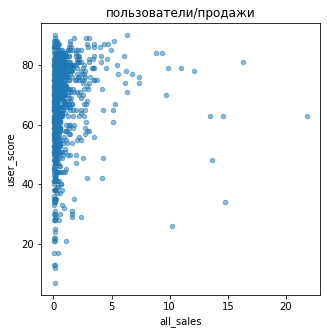

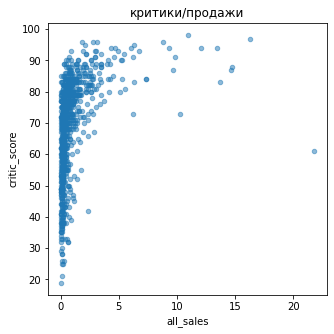

In [82]:
# X360
# строим диаграмму рассеяния для X360 по оценкам пользователей
df_x360_critics.plot(x='all_sales', y='user_score', kind='scatter', figsize=(5,5),alpha=0.5, title='пользователи/продажи')
df_x360_critics.plot(x='all_sales', y='critic_score', kind='scatter', figsize=(5,5),alpha=0.5, title='критики/продажи')

In [83]:
# X360
# уберем выбросы и пропуски
df_x360_critics_scatter = df_x360_critics.query('all_sales <= 5  and critic_score >= 25 & critic_score.notna()')
df_x360_critics_scatter_2 = df_x360_critics.query('all_sales <= 5  and user_score >= 25 & user_score.notna()')

In [84]:
# X360
# корреляция
print("Корреляция между продажами и оценками критиков:",df_x360_critics_scatter['all_sales'].corr(df_x360_critics_scatter['critic_score']))
print("Корреляция между продажами и оценками пользователей:",df_x360_critics_scatter_2['all_sales'].corr(df_x360_critics_scatter_2['user_score']))

Корреляция между продажами и оценками критиков: 0.51598240988034
Корреляция между продажами и оценками пользователей: 0.2134670913518376


***PS2***

In [85]:
df_ps2_critics = df_release.query('platform == "PS2"')

<AxesSubplot:title={'center':'критики/продажи'}, xlabel='all_sales', ylabel='critic_score'>

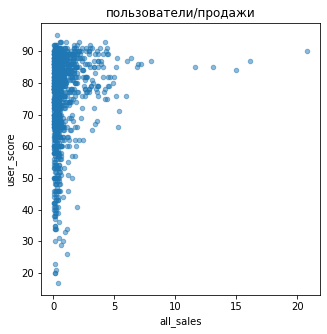

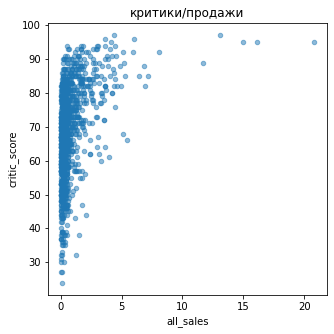

In [86]:
# PS2
# строим диаграмму рассеяния для PS2 по оценкам пользователей
df_ps2_critics.plot(x='all_sales', y='user_score', kind='scatter', figsize=(5,5),alpha=0.5, title='пользователи/продажи')
df_ps2_critics.plot(x='all_sales', y='critic_score', kind='scatter', figsize=(5,5),alpha=0.5, title='критики/продажи')

In [87]:
# PS2
# уберем выбросы
df_ps2_critics_scatter = df_ps2_critics.query('all_sales <= 5  and critic_score >= 35 & critic_score.notna()')
df_ps2_critics_scatter_2 = df_ps2_critics.query('all_sales <= 5  and user_score >= 35 & user_score.notna()')

In [88]:
# PS2
# корреляция
print("Корреляция между продажами и оценками критиков:",df_ps2_critics_scatter['all_sales'].corr(df_ps2_critics_scatter['critic_score']))
print("Корреляция между продажами и оценками пользователей:",df_ps2_critics_scatter['all_sales'].corr(df_ps2_critics_scatter['user_score']))

Корреляция между продажами и оценками критиков: 0.43251048778782947
Корреляция между продажами и оценками пользователей: 0.1896802778326483


***DS***

In [89]:
df_ds_critics = df_release.query('platform == "DS"')

<AxesSubplot:title={'center':'критики/продажи'}, xlabel='all_sales', ylabel='critic_score'>

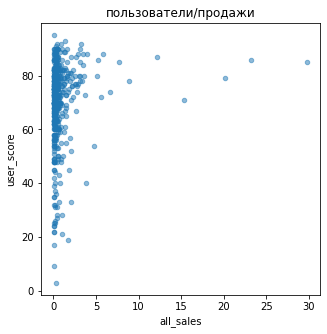

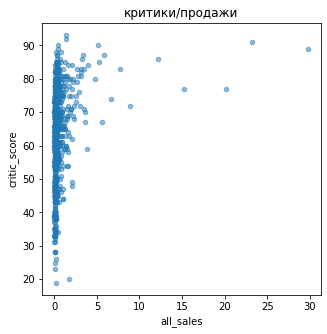

In [90]:
# DS
# строим диаграмму рассеяния для DS по оценкам пользователей
df_ds_critics.plot(x='all_sales', y='user_score', kind='scatter', figsize=(5,5),alpha=0.5, title='пользователи/продажи')
df_ds_critics.plot(x='all_sales', y='critic_score', kind='scatter', figsize=(5,5),alpha=0.5, title='критики/продажи')

In [91]:
# DS
# уберем выбросы
df_ds_critics_scatter = df_ds_critics.query('all_sales <= 5  and critic_score >= 30 & critic_score.notna()')
df_ds_critics_scatter_1 = df_ds_critics.query('all_sales <= 5  and user_score >= 35 & user_score.notna()')

In [92]:
print("Корреляция между продажами и оценками критиков:",df_ds_critics_scatter['all_sales'].corr(df_ds_critics_scatter['critic_score']))
print("Корреляция между продажами и оценками пользователей:",df_ds_critics_scatter_1['all_sales'].corr(df_ds_critics_scatter_1['user_score']))

Корреляция между продажами и оценками критиков: 0.2917005201236049
Корреляция между продажами и оценками пользователей: 0.13959157037557882


***PS3***

In [93]:
df_ps3_critics = df_release.query('platform == "PS3"')

<AxesSubplot:title={'center':'критики/продажи'}, xlabel='all_sales', ylabel='critic_score'>

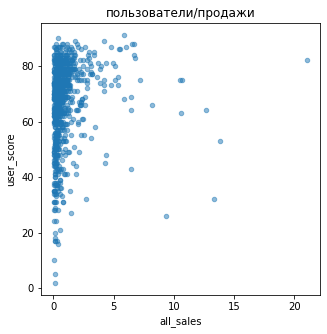

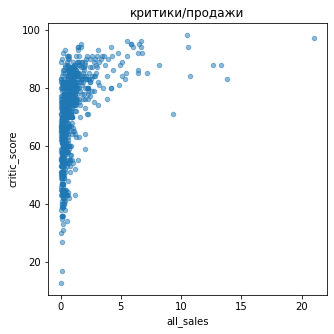

In [94]:
# PS3
# строим диаграмму рассеяния для PS3 по оценкам пользователей
df_ps3_critics.plot(x='all_sales', y='user_score', kind='scatter', figsize=(5,5),alpha=0.5, title='пользователи/продажи')
df_ps3_critics.plot(x='all_sales', y='critic_score', kind='scatter', figsize=(5,5),alpha=0.5, title='критики/продажи')

In [95]:
# PS3
# уберем выбросы
df_ps3_critics_scatter = df_ps3_critics.query('all_sales <= 5  and critic_score >= 30 & critic_score.notna()')
df_ps3_critics_scatter_1 = df_ps3_critics.query('all_sales <= 5  and user_score >= 30 & user_score.notna()')                                              

In [96]:
# PS3
# корреляция 

print("Корреляция между продажами и оценками критиков:",df_ps3_critics_scatter['all_sales'].corr(df_ps3_critics_scatter['critic_score']))
print("Корреляция между продажами и оценками пользователей:",df_ps3_critics_scatter_1['all_sales'].corr(df_ps3_critics_scatter_1['user_score']))

Корреляция между продажами и оценками критиков: 0.5193042847114162
Корреляция между продажами и оценками пользователей: 0.2269195992038664


***Wii***

In [97]:
df_wii_critics = df_release.query('platform == "Wii"')

<AxesSubplot:title={'center':'критики/продажи'}, xlabel='all_sales', ylabel='critic_score'>

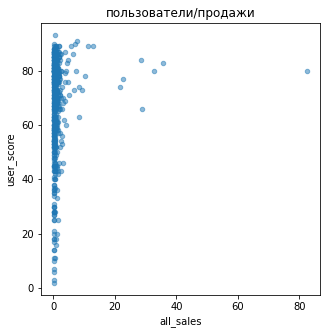

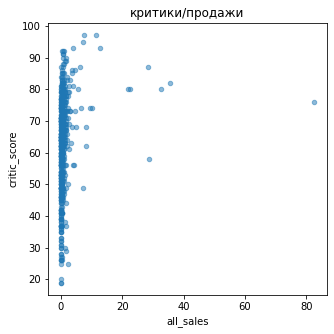

In [98]:
# Wii
# строим диаграмму рассеяния для Wii по оценкам пользователей
df_wii_critics.plot(x='all_sales', y='user_score', kind='scatter', figsize=(5,5),alpha=0.5, title='пользователи/продажи')
df_wii_critics.plot(x='all_sales', y='critic_score', kind='scatter', figsize=(5,5),alpha=0.5, title='критики/продажи')

In [99]:
# Wii
# уберем выбросы и пропуски

df_wii_critics_scatter = df_wii_critics.query('all_sales <= 5  and critic_score >= 30 & critic_score.notna()')
df_wii_critics_scatter_1 = df_wii_critics.query('all_sales <= 5  and user_score >= 30 & user_score.notna()')                                              

In [100]:
# Wii
# корреляция 

print("Корреляция между продажами и оценками критиков:",df_wii_critics_scatter['all_sales'].corr(df_wii_critics_scatter['critic_score']))
print("Корреляция между продажами и оценками пользователей:",df_wii_critics_scatter_1['all_sales'].corr(df_wii_critics_scatter_1['user_score']))

Корреляция между продажами и оценками критиков: 0.30559665496181576
Корреляция между продажами и оценками пользователей: 0.09405783100122402


По "классическим" платформам корреляция схожа: оценки пользователей практически не играют роли в объемах продаж либо корреляция сильно ниже, чем по оценкам критиков, а оценки критиков имеют большой вес для таких платформ как PS2, PS3, X360, в то время как по DS и Wii корреляция по этому параметру ниже. <br> Дополнительно мы можем посмотреть, какие жанры популярны для описанных выше платформ:

In [101]:
df_release.query('platform=="PS3" or platform=="PS2" or platform=="X360" or platform=="DS" or platform=="Wii"').pivot_table(index=['genre'],columns='platform',values='name',aggfunc='count')

platform,DS,PS2,PS3,Wii,X360
genre,,,,,
Action,332,345,373,229,317
Adventure,236,196,72,82,48
Fighting,36,146,76,41,65
Misc,387,218,122,272,123
Platform,89,101,36,57,25
Puzzle,234,18,2,54,6
Racing,66,212,90,91,101
Role-Playing,196,183,117,35,75
Shooter,42,158,155,61,197


Для всех платформ очень высокие показатели имеет жанр Action. Подтверждением нашего предположения о более казуальных пользователях портативных консолей является то, что жанр Misc (а также Puzzle) наиболее популярен среди платформ Wii и DS. 


Теперь рассмотрим распределение по жанрам более внимательно в следующем этапе исследования.

<a class="anchor" id="14-bullet"></a>
### Распределение игр по жанрам

Рассмотрим распределение прибыли по жанрам. Для этого построим таблицу с общим объемом продаж, количеством выпущенных игр и конверсией (сколько прибыли приносит 1 выпущенная игра в среднем).

In [102]:
# пивот по сумме продаж по жанрам и кол-ву игр
df_genre = df_sales_new.pivot_table(index=['genre'],values='all_sales',aggfunc=['median','count'])

# переименовываем столбцы
df_genre.columns=['sales','games']

# считаем долю прибыли по жанру среди всех жанров
df_genre['share'] = df_genre['sales'] / df_genre['sales'].sum()*100

# выводим итоговую таблицу
display(df_genre.sort_values(by='sales',ascending=False))

,sales,games,share
genre,,,
Shooter,0.440,235,24.242424
Sports,0.240,268,13.223140
Platform,0.210,85,11.570248
Role-Playing,0.140,370,7.713499
Racing,0.140,115,7.713499
Fighting,0.130,109,7.162534
Action,0.120,1031,6.611570
Misc,0.120,192,6.611570
Simulation,0.120,80,6.611570


Для периода продаж с 2012 по 2016 года самым прибыльным жанром является Shooter с долей в 24% от общего объема в медианными продажами в 0,4 млн, затем идёт Sports (13%) и 0,24 млн, на 3 месте Platform (11%) с медианными продажами в 0,2 млн.<br> Самыми непопулярными жанрами являются Strategy (4.4%), Puzzle (2.4%) и Adventure (1.6%).

Рассмотрим распределение по жанрам для каждой из перспективных платформ.

***PS4***

In [103]:
# query
df_genre_ps4 = df_sales_new.query('platform=="PS4"')

# пивот по сумме продаж по жанрам и кол-ву игр
df_genre_ps4 = df_genre_ps4.pivot_table(index=['genre'],values='all_sales',aggfunc=['sum','count'])

# переименовываем столбцы
df_genre_ps4.columns=['sales','games']

# считаем конверсию по жанру
df_genre_ps4['conversion'] = df_genre_ps4['sales'] / df_genre_ps4['games']

# считаем долю прибыли по жанру среди всех жанров
df_genre_ps4['share'] = df_genre_ps4['sales'] / df_genre_ps4['sales'].sum()*100

# выводим итоговую таблицу
display(df_genre_ps4.sort_values(by='sales',ascending=False))

,sales,games,conversion,share
genre,,,,
Action,96.10,144,0.667361,30.591456
Shooter,88.56,41,2.160000,28.191252
Sports,55.61,46,1.208913,17.702298
Role-Playing,28.99,51,0.568431,9.228370
Racing,12.14,19,0.638947,3.864519
Fighting,8.65,18,0.480556,2.753549
Misc,8.19,20,0.409500,2.607118
Platform,7.69,12,0.640833,2.447953
Adventure,6.34,28,0.226429,2.018208


Для PS4 самым продаваемым жанром является жанр Action (30.5%), Shooter (28%) и Sports (17.7%). Наибольшая конверсия у жанра Shooter (2.16 млн).<br>

Самым непопулярным жанром является Puzzle (менее 1%) с самой низкой конверсией (0.02 млн)

***XOne***

In [104]:
# query
df_genre_xone = df_sales_new.query('platform=="XOne"')

# пивот по сумме продаж по жанрам и кол-ву игр
df_genre_xone = df_genre_xone.pivot_table(index=['genre'],values='all_sales',aggfunc=['sum','count'])

# переименовываем столбцы
df_genre_xone.columns=['sales','games']

# считаем конверсию по жанру
df_genre_xone['conversion'] = df_genre_xone['sales'] / df_genre_xone['games']

# считаем долю прибыли по жанру среди всех жанров
df_genre_xone['share'] = df_genre_xone['sales'] / df_genre_xone['sales'].sum()*100

# выводим итоговую таблицу
display(df_genre_xone.sort_values(by='sales',ascending=False))

,sales,games,conversion,share
genre,,,,
Shooter,60.33,38,1.587632,37.867186
Action,37.31,85,0.438941,23.418278
Sports,26.74,38,0.703684,16.783831
Role-Playing,10.55,14,0.753571,6.621893
Racing,9.79,20,0.489500,6.144866
Misc,7.43,19,0.391053,4.663570
Adventure,2.68,14,0.191429,1.682149
Fighting,2.45,7,0.350000,1.537786
Platform,0.93,5,0.186000,0.583731


Для XOne самым продаваемым жанром является жанр  Shooter (37.8%), Action (23.4%), и Sports (16.7%). Наибольшая конверсия у жанра Shooter (1.5 млн). Жанра Puzzle на платформе нет.<br>

Самым непопулярным жанром является Strategy (менее 3%) с самой низкой конверсией (0.14 млн).

***PSV***

In [105]:
# query
df_genre_psv = df_sales_new.query('platform=="PSV"')

# пивот по сумме продаж по жанрам и кол-ву игр
df_genre_psv = df_genre_psv.pivot_table(index=['genre'],values='all_sales',aggfunc=['sum','count'])

# переименовываем столбцы
df_genre_psv.columns=['sales','games']

# считаем конверсию по жанру
df_genre_psv['conversion'] = df_genre_psv['sales'] / df_genre_psv['games']

# считаем долю прибыли по жанру среди всех жанров
df_genre_psv['share'] = df_genre_psv['sales'] / df_genre_psv['sales'].sum()*100

# выводим итоговую таблицу
display(df_genre_psv.sort_values(by='sales',ascending=False))

,sales,games,conversion,share
genre,,,,
Action,16.33,145,0.112621,33.204555
Role-Playing,12.05,84,0.143452,24.501830
Misc,4.32,22,0.196364,8.784059
Adventure,3.79,92,0.041196,7.706385
Sports,3.21,21,0.152857,6.527044
Shooter,2.34,4,0.585000,4.758032
Platform,2.26,8,0.282500,4.595364
Fighting,2.21,14,0.157857,4.493697
Racing,2.21,9,0.245556,4.493697


Для PSV самым продаваемым жанром является жанр Action (33.2%), Role-Playing (24.5%), и Misc (8.7%). Наибольшая конверсия у жанра Shooter (0.58 млн), хотя по объему продаж данный жанр не входит в первую тройку.<br>

Самым непопулярным жанром является Strategy, Puzzle и Simulation (менее 1%) с самой низкой конверсией (~0.03 млн).

***PC***

In [106]:
# query
df_genre_pc = df_sales_new.query('platform=="PC"')

# пивот по сумме продаж по жанрам и кол-ву игр
df_genre_pc = df_genre_pc.pivot_table(index=['genre'],values='all_sales',aggfunc=['sum','count'])

# переименовываем столбцы
df_genre_pc.columns=['sales','games']

# считаем конверсию по жанру
df_genre_pc['conversion'] = df_genre_pc['sales'] / df_genre_pc['games']

# считаем долю прибыли по жанру среди всех жанров
df_genre_pc['share'] = df_genre_pc['sales'] / df_genre_pc['sales'].sum()*100

# выводим итоговую таблицу
display(df_genre_pc.sort_values(by='sales',ascending=False))

,sales,games,conversion,share
genre,,,,
Shooter,14.27,41,0.348049,22.777334
Role-Playing,13.65,27,0.505556,21.787709
Action,13.14,66,0.199091,20.973663
Simulation,9.22,23,0.400870,14.716680
Strategy,5.99,26,0.230385,9.561053
Sports,3.26,17,0.191765,5.203512
Racing,1.23,20,0.061500,1.963288
Adventure,0.87,17,0.051176,1.388667
Misc,0.73,5,0.146000,1.165204


Для платформы PC самым продаваемым жанром является жанр Shooter (22.7%), Role-Playing (21.7%), и Action (20.9%). Наибольшая конверсия у жанра Role-Playing (0.5 млн).<br>

Самым непопулярным жанром является Platform, Fighting и Puzzle (менее 1%) с самой низкой конверсией (от 0.04 млн и ниже).

***3DS***

In [107]:
# query
df_genre_3ds = df_sales_new.query('platform=="3DS"')

# пивот по сумме продаж по жанрам и кол-ву игр
df_genre_3ds = df_genre_3ds.pivot_table(index=['genre'],values='all_sales',aggfunc=['sum','count'])

# переименовываем столбцы
df_genre_3ds.columns=['sales','games']

# считаем конверсию по жанру
df_genre_3ds['conversion'] = df_genre_3ds['sales'] / df_genre_3ds['games']

# считаем долю прибыли по жанру среди всех жанров
df_genre_3ds['share'] = df_genre_3ds['sales'] / df_genre_3ds['sales'].sum()*100

# выводим итоговую таблицу
display(df_genre_3ds.sort_values(by='sales',ascending=False))

,sales,games,conversion,share
genre,,,,
Role-Playing,79.30,79,1.003797,40.748163
Action,45.49,156,0.291603,23.374955
Simulation,19.93,20,0.996500,10.240995
Platform,19.11,19,1.005789,9.819639
Misc,9.45,41,0.230488,4.855866
Fighting,8.46,9,0.940000,4.347156
Adventure,4.30,33,0.130303,2.209547
Sports,4.23,12,0.352500,2.173578
Puzzle,2.66,13,0.204615,1.366836


Для платформы 3DS самым продаваемым жанром является жанр Role-Playing (40.7%). Наибольшая конверсия у жанра Role-Playing (1 млн) и у жанра Platform (1 млн).<br>

Самым непопулярным жанром является Shooter (менее 1%) с самой низкой конверсией (0.065 млн), в то время как на других платформах данный жанр находится стабильно в топ 3 по прибыли.

<a class="anchor" id="15-bullet"></a>
### Выводы

1. На данном этапе мы определили, что наиболее подходящим периодом, на основе которого мы будем строить наше дальнейшее исследование, является период с 2012 по 2016 год. 
2. Был определен средний показатель жизненного цикла платформы в 10 лет.
3. Далее, мы рассмотрели объем продаж в разрезе по платформам, где выявили наиболее актуальные платформы, которые будут популярны в прогнозируемом периоде: PS4, XOne, 3DS, PC, PSV. 
4. Для потенциальных платформ периода 12-16 года, а также для самых популярных за период с 1999 по 2016г. мы рассмотрели корреляции между объемом проданных копий и оценками критиков и пользователей: корреляция более значима для пары оценка критиков/объем продаж для стационарных платформ, таких как PS, PC и Xbox. Для портативных, более "казуальных" Wii, DS, PSV, платформ влияние на продажи от оценок критиков либо отсутствует, либо сильно ниже стационарных аналогов.
5. Были рассмотрены продажи в разрезе по жанрам в общем и для каждой из перспективных платформ c 2012 по 2016 год: среди всех платформ лидирует жанр Shooter (24% от объема всех продаж; медианные продажи - 0,4 млн).
6. Наиболее популярными жанрами для платформ оказались: для PS4 - Action, для XOne - Shooter, для 3DS - RPG, для PSV - Action, для PC - Shooter.

## Портрет пользователя каждого региона

1. Определите для пользователя каждого региона (NA, EU, JP):<br>
2. Самые популярные платформы (топ-5). Опишите различия в долях продаж.<br>
3. Самые популярные жанры (топ-5). Поясните разницу.<br>
4. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

<a class="anchor" id="16-bullet"></a>
### Портрет пользователя: EU

In [108]:
# выведем 5 самых популярных по продажам в EU регионе платформ и их долю

eu_sales = df_sales_new.pivot_table(index='platform',values=['eu_sales'],aggfunc='sum').sort_values(by='eu_sales',ascending=False)
eu_sales['share']=eu_sales['eu_sales'] / eu_sales['eu_sales'].sum() * 100
eu_sales.head()

,eu_sales,share
platform,,
PS4,141.09,27.838286
PS3,106.86,21.084409
X360,74.52,14.703445
XOne,51.59,10.179156
3DS,42.64,8.413243


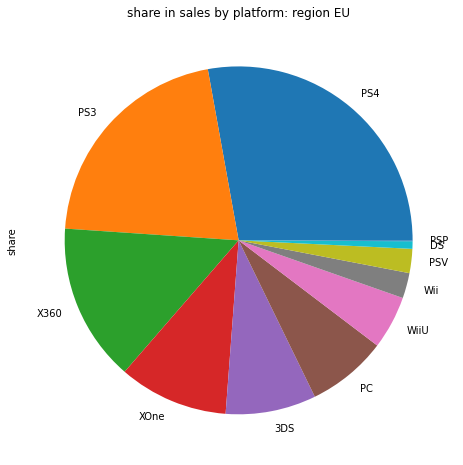

In [109]:
plot = eu_sales.plot.pie(y='share', figsize=(8, 8),legend = 0, title='share in sales by platform: region EU')

In [110]:
# суммарная выручка по региону EU
round(eu_sales['eu_sales'].sum())

507

Суммарно объем продаж в регионе EU составляет 507 миллионов. Самой продаваемой платформой в регионе является PS4 (27.8%), затем идет более ранняя версия данной приставки - PS3 (21%). Далее, с долей в 14.7% идёт американский конкурент японской PS3 - Xbox360. Замыкают рейтинг более новая версия Xbox360 - XOne (10%) и японская 3DS (8.4%).

In [111]:
# выведем 5 самых популярных по продажам в EU регионе жанров и их долю
eu_sales = df_sales_new.pivot_table(index='genre',values=['eu_sales'],aggfunc='sum').sort_values(by='eu_sales',ascending=False)
eu_sales['share']=eu_sales['eu_sales'] / eu_sales['eu_sales'].sum()*100
eu_sales.head()

,eu_sales,share
genre,,
Action,159.34,31.439170
Shooter,113.47,22.388619
Sports,69.09,13.632059
Role-Playing,48.53,9.575392
Racing,27.29,5.384555


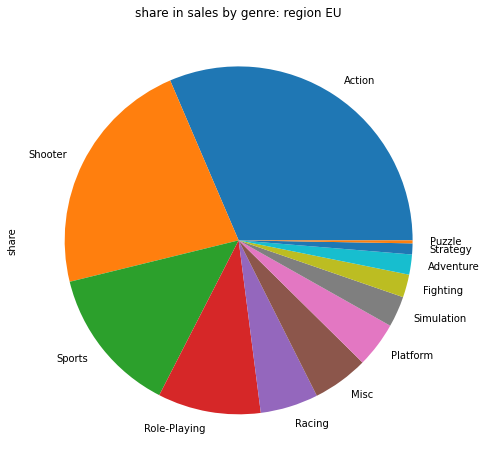

In [112]:
plot = eu_sales.plot.pie(y='share', figsize=(8, 8),legend = 0, title='share in sales by genre: region EU')

С большим отрывом лидирует жанр Action (31.4%), затем идёт Shooter (22%) и Sports (13.6%).  Замыкает рейтинг Role-Playing (9.5%) и Racing (5.3%). Лидерство жанра Action может быть объяснено многочисленной взрослой аудиторией в данном регионе, а популярность жанра Sports обязана традиционной известности серии FIFA в Великобритании - родине футбола.

In [113]:
#Напишем функцию, которая определяет категорию для возрастного рейтинга

pd.options.mode.chained_assignment = None

def category(rating):
    ''' 
    Функция выставляет рейтинг от самого низкого возраста к самому высокому, 
    где RP - самый низкий (подходит для маленьких детей), а AO - самый высокий (18+);
    NR - рейтинг отсутствует.
    '''    
    if rating == 'RP':
        return 0
    if rating == 'EC':
        return 1
    if rating == 'E':
        return 2
    if rating == 'E10+':
        return 3
    if rating == 'K-A':
        return 4
    if rating == 'T':
        return 5
    if rating == 'M':
        return 6
    if rating == 'AO':
        return 7
    if rating == 'NR':
        return 8

#Применим функцию к датафрейму
df_sales_new['rating_new'] = df_sales_new['rating'].apply(category)

In [114]:
# посчитаем корреляцию между возрастным рейтингом и уровнем продаж
print(df_sales_new['eu_sales'].corr(df_sales_new['rating_new']))

-0.12983659889119908


Зависимость между возрастным рейтингом и уровнем продаж в регионе EU отсутствует - рейтинг не влияет на продажи.

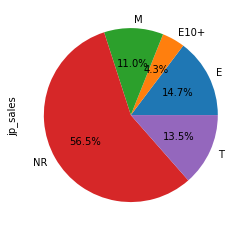

In [143]:
#Код ревьюера
df_sales_new.groupby('rating')['jp_sales'].sum().plot(kind = 'pie', autopct = '%.1f%%')
plt.show()

Средний пользователь региона EU играет на PS4 или PS3, его предпочитаемый жанр - Action или Shooter.

<a class="anchor" id="17-bullet"></a>
### Портрет пользователя: NA

In [115]:
# выведем 5 самых популярных по продажам в NA регионе платформ и их долю
na_sales = df_sales_new.pivot_table(index='platform',values=['na_sales'],aggfunc='sum').sort_values(by='na_sales',ascending=False)
na_sales['share']=na_sales['na_sales'] / na_sales['na_sales'].sum() * 100
na_sales.head()

,na_sales,share
platform,,
X360,140.05,23.698326
PS4,108.74,18.400257
PS3,103.38,17.493274
XOne,93.12,15.757145
3DS,55.31,9.359189


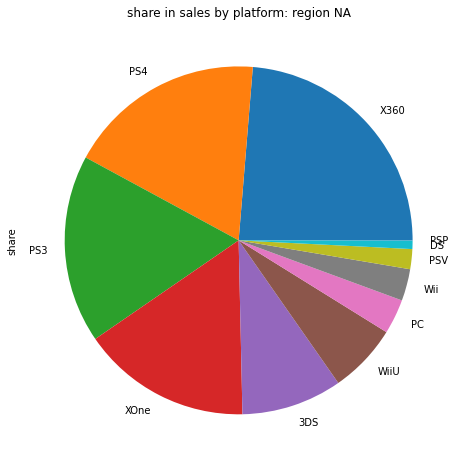

In [116]:
plot = na_sales.plot.pie(y='share', figsize=(8, 8),legend = 0, title='share in sales by platform: region NA')

In [117]:
round(na_sales['na_sales'].sum())

591

Объем продаж - 591 миллион, выше, чем в регионе EU. В регионе NA лидирует платформа компании Microsoft - X360 (23.6%), ближайший конкурент которой занимает твердую позицию платформа от Sony - PS4 (18.4%). Очень близко - на 3 месте - идёт PS3 (17.5%). На 4 месте идет обновленная версия X360 - XOne c долей 15.75%, замыкает пятерку 3DS (9.35%). На данном рынке идёт сильная конкуренция между линейками Xbox (39.44%) и PS (35.89%), в то время как в регионе EU линейка PS лидирует с сильным отрывом (48.91% у PS и 24.87% у Xbox). 

In [118]:
# выведем 5 самых популярных по продажам в NA регионе жанров и их долю
na_sales = df_sales_new.pivot_table(index='genre',values=['na_sales'],aggfunc='sum').sort_values(by='na_sales',ascending=False)
na_sales['share']=na_sales['na_sales'] / na_sales['na_sales'].sum() * 100
na_sales.head()

,na_sales,share
genre,,
Action,177.84,30.092898
Shooter,144.77,24.497013
Sports,81.53,13.795963
Role-Playing,64.00,10.829653
Misc,38.19,6.462257


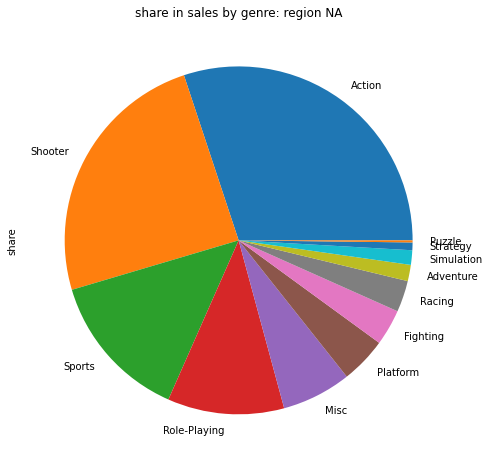

In [119]:
plot = na_sales.plot.pie(y='share', figsize=(8, 8),legend = 0, title='share in sales by genre: region NA')

Как и в регионе EU, на рынке NA лидирует жанр Action - 30% от всех продаж в регионе. Затем идёт жанр Shooter - 24.49%. У жанра Sports (в США традиционно популярны серии NBA и NFL) - 13.79%. Замыкают пятерку лидеров такие жанры как Misc (6.46%) и Role-Playing (10.82%). В целом, распределение по жанрам, особенно в первой тройке, между регионами NA и EU очень схоже.

In [120]:
# посчитаем корреляцию между возрастным рейтингом и уровнем продаж
print(df_sales_new['na_sales'].corr(df_sales_new['rating_new']))

-0.12812048351776326


Корреляции между продажами и возрастным рейтингом также не обнаружено.

Средний пользователь региона NA играет на Xbox360, его предпочитаемый жанр - Action или Shooter.

<a class="anchor" id="18-bullet"></a>
### Портрет пользователя: JP

In [121]:
# выведем 5 самых популярных по продажам в JP регионе платформ и их долю
jp_sales = df_sales_new.pivot_table(index='platform',values=['jp_sales'],aggfunc='sum').sort_values(by='jp_sales',ascending=False)
jp_sales['share']=jp_sales['jp_sales'] / jp_sales['jp_sales'].sum() * 100
jp_sales.head()

,jp_sales,share
platform,,
3DS,87.79,45.586250
PS3,35.29,18.324852
PSV,21.04,10.925330
PS4,15.96,8.287465
WiiU,13.01,6.755634


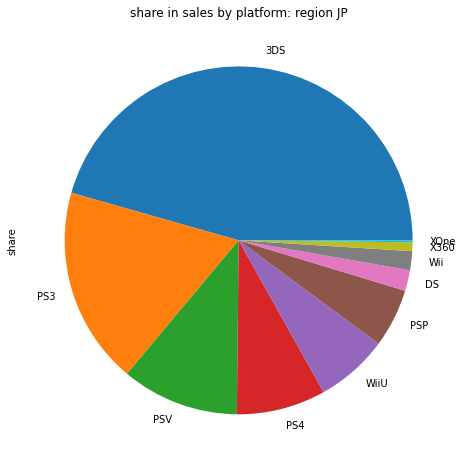

In [122]:
plot = jp_sales.plot.pie(y='share', figsize=(8, 8),legend = 0, title='share in sales by platform: region JP')

In [123]:
round(jp_sales['jp_sales'].sum())

193

Все 5 платформ рейтинга родом из Японии, суммарный объем продаж в регионе - 193 млн. Самой прибыльной платформой является 3DS c огромной долей в 45.5%. Затем идёт PS3 (18.32%) и PSV (10.92%). Обновленная версия PS3 - PS4 занимает 8.28% рынка, что сильно отличается от доли этой же платформы в регионах EU и NA. Появилась в топе и платформа WiiU с долей в 6.75%, не столь популярная на других рынках. 

In [124]:
# выведем 5 самых популярных по продажам в JP регионе жанров и их долю
jp_sales = df_sales_new.pivot_table(index='genre',values=['jp_sales'],aggfunc='sum').sort_values(by='jp_sales',ascending=False)
jp_sales['share']=jp_sales['jp_sales'] / jp_sales['jp_sales'].sum() * 100
jp_sales.head()

,jp_sales,share
genre,,
Role-Playing,65.44,33.980683
Action,52.80,27.417177
Misc,12.86,6.677744
Simulation,10.41,5.405546
Fighting,9.44,4.901859


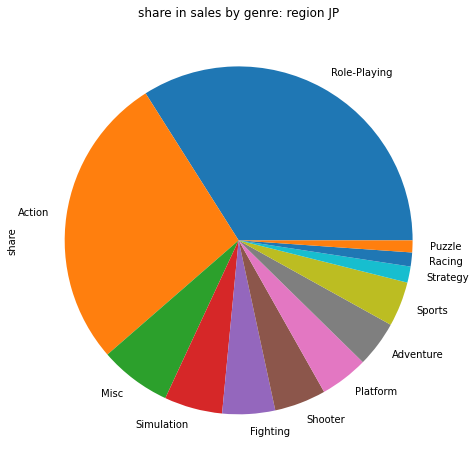

In [125]:
plot = jp_sales.plot.pie(y='share', figsize=(8, 8),legend = 0, title='share in sales by genre: region JP')

На данном рынке есть 2 безусловных лидера по жанрам - Role-Playing (34%) и Action (27.4%). Остальные жанры Misc, Simulation и Fighting занимают примерно одинаковую долю от 5% до 6.7%.

In [126]:
# посчитаем корреляцию между возрастным рейтингом и уровнем продаж
print(df_sales_new['jp_sales'].corr(df_sales_new['rating_new']))

0.04971805815399014


Корреляции между продажами и рейтингом не обнаружено. Рынок сильно отличается от NA и EU по набору популярных жанров и платформ.

Средний пользователь региона JP играет на 3DS, его предпочитаемый жанр - RPG.

<a class="anchor" id="19-bullet"></a>
### Выводы

<strong>Вывод:</strong><br>
Проанализировав каждый регион, можно сделать вывод, что регионы NA и EU очень схожи по жанрам, поэтому для этих регионов стоит обратить внимание на такие жанры как Shooter, Action и Sports. Для региона JP нужен отдельный подход, т.к. он сильно отличается по жанрам и по платформам: здесь популярны игры жанра Role-Playing и Action, а платформа 3DS занимает практически половину всего рынка - 45%, ближайшая "стационарная" платформа это PS3 (18.32%). Что касается распределения платформ в регионах EU и NA, сильны позиции таких платформ как XOne, Xbox360, PS3 и PS4 (у линейки PS сильнее позиции в регионе EU) - все платформы стационарные и сильно отрываются от ближайшего портативного конкурента.

<br> Корреляции между рейтингом и продажами не обнаружено ни для одного из рассматриваемых регионов.

## Проверка гипотез

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;<br>
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-
игры) и Sports (англ. «спортивные соревнования») разные.<br>
3. Поясните: Как вы сформулировали нулевую и альтернативную гипотезы;<br>
Какой критерий применили для проверки гипотез и почему.<br>

<a class="anchor" id="20-bullet"></a>
### Средние пользовательские рейтинги платформ Xbox One и PC равны

Выборка: данные о продажах игр с 2012 по 2016 год.<br>
Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC равны.<br>
Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC неравны.<br>

In [127]:
# создадим отдельный датафрейм для каждой из платформ

xbox_one = df_sales_new.query('platform=="XOne" & user_score.notna()')
pc = df_sales_new.query('platform=="PC" & user_score.notna()')

In [128]:
# величина выборки

display(len(xbox_one))
display(len(pc))

182

206

Посчитаем дисперсии выборок.

In [129]:
# дисперсия для Xone
x = xbox_one['user_score'] # совокупность
variance = np.var(x)
print(variance) 

189.65188383045526


In [130]:
# дисперсия для PC
y = pc['user_score'] # совокупность
variance = np.var(y)
print(variance) 

275.6995239890659


Дисперсии выборок неравны, значит нужно применить условие equal_var = False. Теперь проверим нашу гипотезу о равенстве пользовательских рейтингов с помощью метода для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Критерий альфа возьмём 0.05

In [131]:
# проверка гипотез о равенстве несвязанных выборок генеральной совокупности

sample_1 = xbox_one['user_score']
sample_2 = pc['user_score']

alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var = False) # проверка гипотезы о равенстве средних двух независимых совокупностей

print('p-значение:',results.pvalue) # получившееся p-значение)

if results.pvalue < alpha: # сравнение получившегося p-значение с заданным уровнем статистической значимости :
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965135056
Не получилось отвергнуть нулевую гипотезу


In [132]:
# среднее
pc['user_score'].mean()

64.2864077669903

In [133]:
# среднее
xbox_one['user_score'].mean()

65.21428571428571

Не отвергаем нулевую гипотезу: средние пользовательские рейтинги Xbox One и PC равны.

<a class="anchor" id="21-bullet"></a>
### Средние пользовательские рейтинги жанров Action и Sports разные

Выборка: данные о продажах игр с 2012 по 2016 год.<br>
Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны.<br>
Альтернативная гипотеза: средние пользовательские рейтинги платформ Action и Sports неравны.<br>

In [134]:
# создаем отдельные датафреймы под выборки
action = df_sales_new.query('genre=="Action" & user_score.notna()')
sports = df_sales_new.query('genre=="Sports" & user_score.notna()')

In [135]:
# величина выборки
display(len(action))
display(len(sports))

523

195

Проверим дисперсию. 

In [136]:
a = action['user_score'] # совокупность
variance = np.var(a)
print(variance) 

188.54720340439223


In [137]:
s = sports['user_score'] # совокупность
variance = np.var(s)
print(variance) 

300.7388297172913


Объем выбоки и дисперсии разные, поэтому применяем условие: equal_var = False. Метод для проверки гипотезы применим тот же, что и для проверки предыдущей гипотезы. Alpha = 0.05

In [138]:
# # проверка гипотез о равенстве несвязанных выборок генеральной совокупности

sample_1 = action['user_score']
sample_2 = sports['user_score']

alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var = False) # проверка гипотезы о равенстве средних двух независимых совокупностей

print('p-значение:',results.pvalue) # получившееся p-значение)

if results.pvalue < alpha: # сравнение получившегося p-значение с заданным уровнем статистической значимости :
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.243077765726105e-20
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу - средние пользовательские рейтинги жанров Action и Sports неравны.

In [139]:
# среднее
action['user_score'].mean()

68.25047801147228

In [140]:
# среднее
sports['user_score'].mean()

54.55897435897436

<a class="anchor" id="22-bullet"></a>
### Выводы

На данном этапе исследования мы проверили две гипотезы для выборки по продажам игр с 2012 по 2016 год: 
1. средние пользовательские рейтинги платформ Xbox One и PC равны
2. средние пользовательские рейтинги жанров Action и Sports неравны <br>

С помощью примененных тестов мы доказали, что первая гипотеза должна быть неотвергнута - средние пользовательские рейтинги платформ XOne и PC равны, а вторая гипотеза - отвергнута, т.к. средние пользовательские рейтинги жанров Action и Sports неравны.

<a class="anchor" id="23-bullet"></a>
## Общий вывод

***Цель***

Целью данного исследования является определение закономерностей, которые определяют успешность игры, чтобы спланировать рекламную кампанию.
_____________________________

В результате проведенного исследования было определено, что некоторые регионы требуют индивидуального подхода при планировании рекламной кампании, поэтому ниже предлагается два вывода: для регионов NA и EU и отдельный вывод для региона JP. Все выводы сделаны на основе анализа данных временного отрезка продаж с 2012 по 2016 год. Был определен жизненный цикл платформы в 10 лет, на основе которого были сделаны выводы при выборе потенциально перспективных платформ.
_____

***EU/NA***

Ключевыми факторами, определяющими успешность продаж в данных регионах, являются:
1. Выход игры на таких платформах как Xbox360, XOne, PS3, PS4
2. Жанр игры: Action/Shooter/Sports
3. Высокие рейтинги критиков игровых изданий

Факторы, не оказывающие влияние на успешность продаж:
1. Оценки пользователей
2. Возрастной рейтинг

Для региона EU наболее популярной платформой на данный момент является PS4. Она же является самой перспективной с точки зрения жизненного цикла платформы.<br>
Для региона NA наболее популярной платформой на данный момент является Xbox360. Самой перспективной платформой из наиболее популярных платформ для данного региона является PS4 и XOne.
__________

***JP***

Ключевыми факторами, определяющими успешность продаж в регионе JP, являются:
1. Выход игры на таких платформах как 3DS, PS3, PS4
2. Жанр игры: Action/Role-Playing
3. Высокие рейтинги критиков игровых изданий

Факторы, не оказывающие влияние на успешность продаж:
1. Оценки пользователей
2. Возрастной рейтинг

Для региона JP наболее популярной платформой на данный момент является 3DS. Она же является самой перспективной с точки зрения жизненного цикла платформы наравне с PS3.<br>
______________

***Общий итоговый вывод***

Подытожив данное исследование можно сказать, что игровой рынок падает с 2009 года. Однако несмотря на это, существует платформа, которая относительно стабильна - PC, хоть и продажи на ней сильно ниже, чем у конкурентов, она является наиболее устойчивой в плане жизненного цикла ввиду своей универсальности.<br> Платформы Xbox360 и PS3 остаются в лидерах по продажам, но с учётом того, что на рынке уже появились более новые версии вышедших платформ, они не являются перспективными в долгосроке. <br>При формировании рекламной кампании следует внимательно рассмотреть то, на каких платформах, какого жанра и в каком регионе будет выпущена игра, т.к. это три ключевых момента, которые будут влиять на её популярность.<br> Ещё одним фактором можно выделить то, что при выпуске эксклюзивов для любой из перспективных платформ следует обратить особое внимание на то, какого жанра эта игра и на какой платформе она будет выпущена, т.к. для более хардкорных платформ, таких как серии PS и Xbox более популярны одни жанры, а для платформ портативных, более известны жанры казуальные.<br>

В данном исследовании также было поставлено 2 гипотезы, после проверки которых можно сделать вывод что:
1. средние пользовательские рейтинги платформ Xbox One и PC равны
2. средние пользовательские рейтинги жанров Action и Sports неравны <br>

Однако, ввиду того, что ранее в данном исследовании влияния пользовательских рейтингов на продажи игр обнаружено не было, то данные гипотезы не вляют на то, как будет построена рекламная кампания.